In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/borivalieast/BorivaliEastMumbaiIITM.csv
/kaggle/input/mumbai-bandra-air-quality/BandraKurlaComplexMumbaiIITM.csv


In [5]:
df = pd.read_csv('/kaggle/input/borivalieast/BorivaliEastMumbaiIITM.csv')

In [6]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 kB 9.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.4/372.4 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.9/242.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 7.0 MB/s eta 0:00:00
    

In [7]:
df.rename(columns = {'From Date':'Date'}, inplace = True)

In [8]:
df25 = df[['Date','PM2.5']]

In [9]:
df25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76364 entries, 0 to 76363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    76364 non-null  object
 1   PM2.5   76364 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [10]:
df25.head()

,Date,PM2.5
0,01-01-2021 00:00,52.69
1,01-01-2021 00:15,52.69
2,01-01-2021 00:30,58.38
3,01-01-2021 00:45,59.9
4,01-01-2021 01:00,59.9


In [11]:
df25.tail()

,Date,PM2.5
76359,07-03-2023 09:45,66.5
76360,07-03-2023 10:00,64.97
76361,07-03-2023 10:15,62.06
76362,07-03-2023 10:30,62.06
76363,07-03-2023 10:45,62.06


In [12]:
df25["Date"] = pd.to_datetime(df25.Date, format='%d-%m-%Y %H:%M')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
import darts
from darts import TimeSeries
from darts.models import NBEATSModel

In [14]:
df25['PM2.5'].replace('None', np.nan, inplace=True)
df25['PM2.5'] = df25['PM2.5'].astype(float)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df25_hourly = df25.set_index('Date').resample('H').mean().reset_index()

In [16]:
df25_hourly.tail()

,Date,PM2.5
19086,2023-03-07 06:00:00,57.4075
19087,2023-03-07 07:00:00,62.6375
19088,2023-03-07 08:00:00,59.0825
19089,2023-03-07 09:00:00,65.1350
19090,2023-03-07 10:00:00,62.7875


<AxesSubplot:>

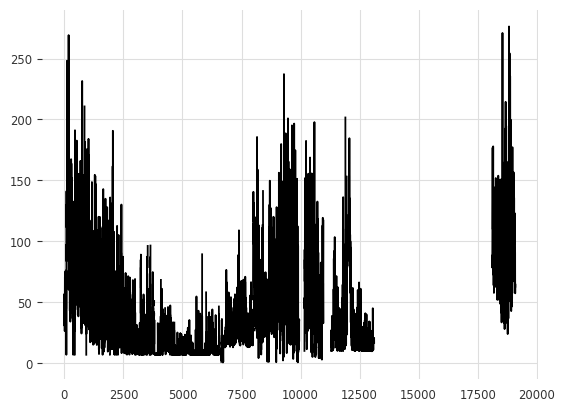

In [17]:
df25_hourly['PM2.5'].plot()

Need to fill missing values

In [18]:
series = TimeSeries.from_dataframe(df=df25_hourly, time_col='Date', value_cols= ['PM2.5'], fill_missing_dates=True, freq='H')

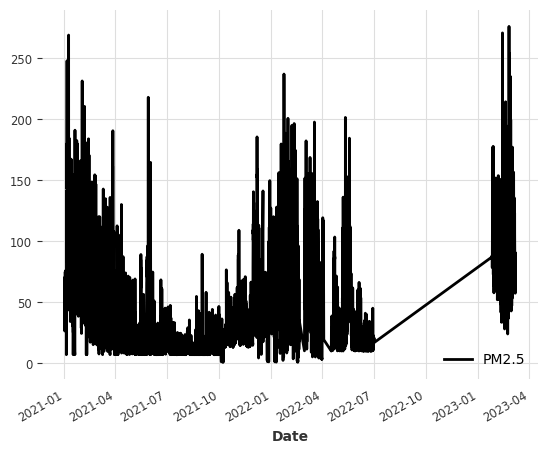

In [19]:
from darts.utils.missing_values import fill_missing_values
series = fill_missing_values(series)
series.plot()

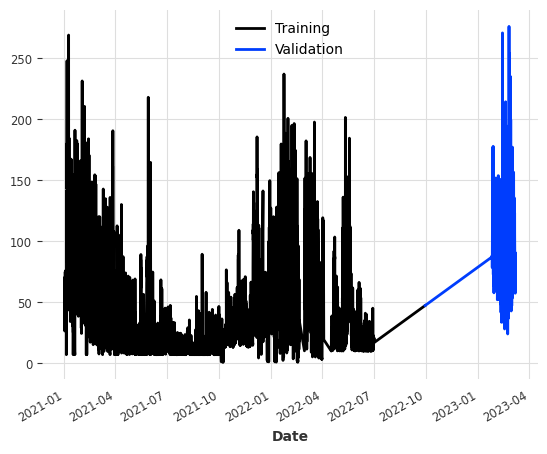

In [20]:
train, val = series.split_before(0.80)
train.plot(label='Training')
val.plot(label='Validation')

We have (almost) continuous data till 2022-07. We'll consider that period for training and prediction and see how the algorithm performs

In [21]:
df25_selected = df25[:52318]

<AxesSubplot:>

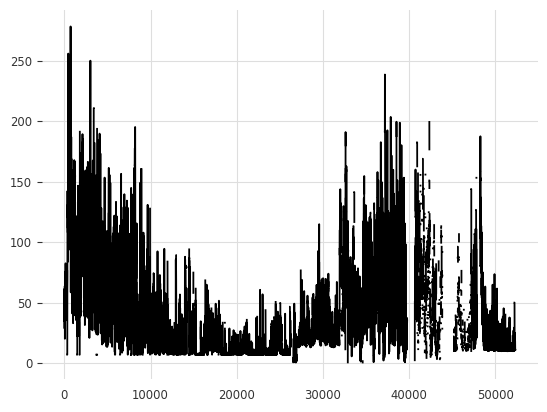

In [22]:
df25_selected['PM2.5'].plot()

In [23]:
df25_selected_hourly = df25_selected.set_index('Date').resample('H').mean().reset_index()

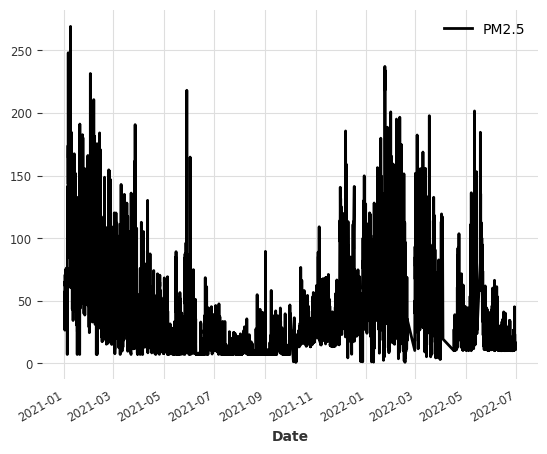

In [24]:
series_selected = TimeSeries.from_dataframe(df=df25_selected_hourly, time_col='Date', value_cols= ['PM2.5'], fill_missing_dates=True, freq='H')

series_selected = fill_missing_values(series_selected)
series_selected.plot()

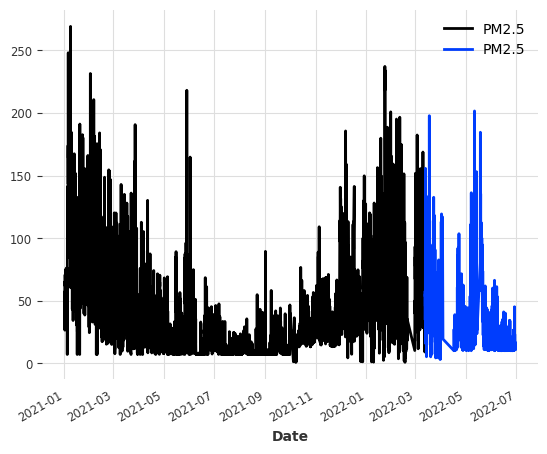

In [25]:
train, val = series_selected.split_before(0.80)
train.plot()
val.plot()

In [26]:
from darts.models import NBEATSModel

In [27]:
nbeats_model = NBEATSModel(input_chunk_length=30, output_chunk_length=4,n_epochs=200,pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    })

/opt/conda/lib/python3.7/site-packages/torch/random.py:111: UserWarning: CUDA reports that you have 2 available devices, and you have used fork_rng without explicitly specifying which devices are being used. For safety, we initialize *every* CUDA device by default, which can be quite slow if you have a lot of GPUs.  If you know that you are only making use of a few CUDA devices, set the environment variable CUDA_VISIBLE_DEVICES or the 'devices' keyword argument of fork_rng with the set of devices you are actually using.  For example, if you are using CPU only, set CUDA_VISIBLE_DEVICES= or devices=[]; if you are using GPU 0 only, set CUDA_VISIBLE_DEVICES=0 or devices=[0].  To initialize all devices and suppress this warning, set the 'devices' keyword argument to `range(torch.cuda.device_count())`.
  ).format(num_devices=num_devices, caller=_caller, devices_kw=_devices_kw))


In [80]:
nbeats_model.fit(train, val_series=val, verbose=True)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [81]:
prediction_model1 = nbeats_model.predict(24,train)

Predicting: 0it [00:00, ?it/s]

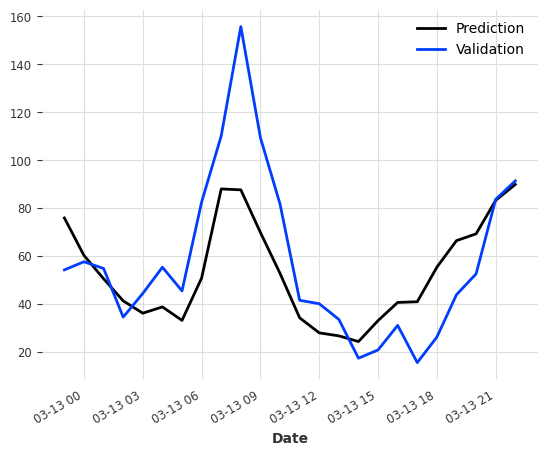

In [86]:
prediction_model1.plot(label = 'Prediction')
val[:24].plot(label = 'Validation')

Unable to predict the peaks.

In [28]:
from darts.metrics import mape

In [73]:
#MAPE FOR NBEATS MODEL - Univariate (PM2.5)
print(mape(prediction_model1, val))

NameError: name 'prediction_model1' is not defined

MAPE for NBEATS Model was ~32

In [87]:
import pickle

In [99]:
pickle.dump(prediction_model1, open('nbeats_200_borivali.pkl', 'wb'))

## **LINEAR REGRESSION**

In [31]:
from darts.models import LinearRegressionModel

In [32]:
df25_hourly.tail()

,Date,PM2.5
19086,2023-03-07 06:00:00,57.4075
19087,2023-03-07 07:00:00,62.6375
19088,2023-03-07 08:00:00,59.0825
19089,2023-03-07 09:00:00,65.1350
19090,2023-03-07 10:00:00,62.7875


In [33]:
df25_series = TimeSeries.from_dataframe(df = df25_hourly, time_col='Date',value_cols=['PM2.5'], fill_missing_dates=True, freq='H')

In [34]:
df25_hourly.isnull().sum()

Date        0
PM2.5    6269
dtype: int64

In [35]:
from darts.dataprocessing.transformers import MissingValuesFiller

In [36]:
mvf = MissingValuesFiller()
df25_seriesFilled = mvf.transform(df25_series)

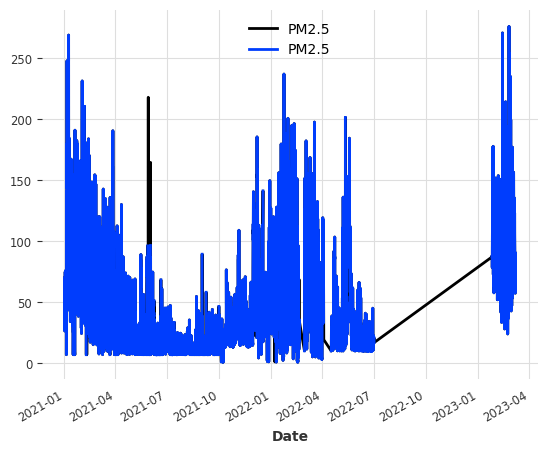

In [37]:
df25_seriesFilled.plot()
df25_series.plot()

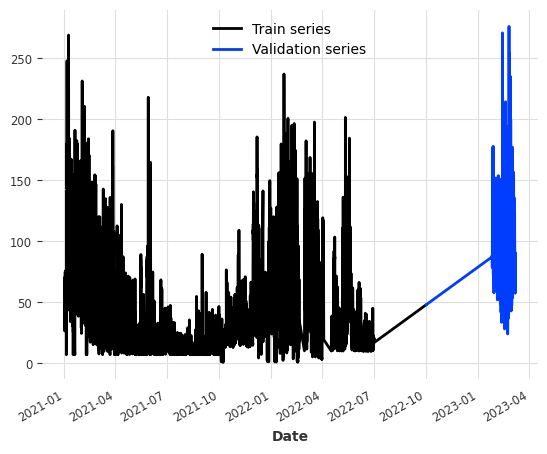

In [38]:
train, val = df25_seriesFilled.split_after(pd.Timestamp('20221001'))#Splitting on timestamp - 1st Oct 2022 taken as splitting point
train.plot(label='Train series')
val.plot(label='Validation series')

### **MODEL 1 - PM2.5**

In [39]:
linearReg = LinearRegressionModel(lags=48)
linearReg.fit(train)

Ref: [Darts-RegressionModel](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.regression_model.html#darts.models.forecasting.regression_model.RegressionModel)

Predicting historical values after the splitting timestamp - 1st Oct 2022(20221001)

In [40]:
prediction_LR1 = linearReg.historical_forecasts(
df25_seriesFilled,
start=pd.Timestamp('20221001'),
retrain = False,
verbose=True
)

  0%|          | 0/3779 [00:00<?, ?it/s]

3.572923457497232


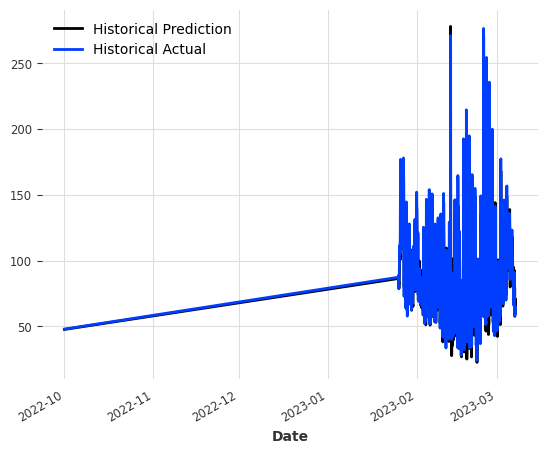

In [41]:
#1st Oct 2022 is our date of splitting - series before it is for training and after it is for validation
prediction_LR1.plot(label='Historical Prediction')
df25_seriesFilled.drop_before(pd.Timestamp('20221001')).plot(label='Historical Actual')
print(mape(prediction_LR1, val))

In [42]:
#Converting original df into hourly timestamp

df['Date'] = pd.to_datetime(df25.Date, format='%d-%m-%Y %H:%M')
df = df.replace('None', np.nan)
df[df.columns[3:]] = df[df.columns[3:]].astype(float)

In [43]:
df_hourly = df.set_index('Date').resample('H').mean().reset_index()

In [44]:
series_hourly_pm25 = TimeSeries.from_dataframe(df_hourly, 'Date', 'PM2.5')
series_hourly_pm10 = TimeSeries.from_dataframe(df_hourly, 'Date', 'PM10')
series_hourly_no = TimeSeries.from_dataframe(df_hourly, 'Date', 'NO')
series_hourly_nox = TimeSeries.from_dataframe(df_hourly, 'Date', 'NOx')
series_hourly_nh3 = TimeSeries.from_dataframe(df_hourly, 'Date', 'NH3')
series_hourly_no2 = TimeSeries.from_dataframe(df_hourly, 'Date', 'NO2')
series_hourly_ozone = TimeSeries.from_dataframe(df_hourly, 'Date', 'Ozone')

In [45]:
series_hourly_pm25 = fill_missing_values(series_hourly_pm25)
series_hourly_pm10 = fill_missing_values(series_hourly_pm10)
series_hourly_no = fill_missing_values(series_hourly_no)
series_hourly_nox = fill_missing_values(series_hourly_nox)
series_hourly_nh3 = fill_missing_values(series_hourly_nh3)
series_hourly_no2 = fill_missing_values(series_hourly_no2)
series_hourly_ozone = fill_missing_values(series_hourly_ozone)

### **MODEL 2 - PM2.5 with PM10**

In [46]:
linearReg2 = LinearRegressionModel(lags=48, lags_past_covariates=48)
linearReg2.fit(train, past_covariates=series_hourly_pm25.stack(series_hourly_pm10))

In [48]:
linReg2_preds = linearReg2.historical_forecasts(
df25_seriesFilled,
start=pd.Timestamp('20221001'),
retrain = False,
verbose=True
)

  0%|          | 0/3779 [00:00<?, ?it/s]

3.572923457497232


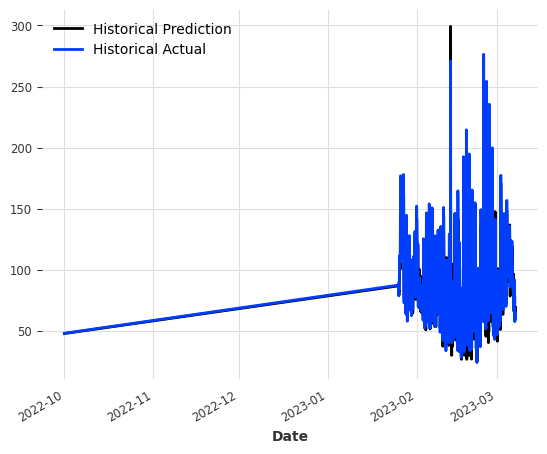

In [50]:
#1st Oct 2022 is our date of splitting - series before it is for training and after it is for validation
linReg2_preds.plot(label='Historical Prediction')
df25_seriesFilled.drop_before(pd.Timestamp('20221001')).plot(label='Historical Actual')
print(mape(prediction_LR1, val))

In [54]:
def PlotPredictions(prediction):
    prediction.plot(label='Historical Prediction')
    df25_seriesFilled.drop_before(pd.Timestamp('20221001')).plot(label='Historical Actual')
    print(mape(prediction, val))

In [55]:
def MakePredictions(model):
    preds = model.historical_forecasts(
    df25_seriesFilled,
    start=pd.Timestamp('20221001'),
    retrain = False,
    verbose=True)
    
    return preds

### **MODEL 3 - PM2.5 with PM10 and NO2**

In [52]:
linearReg3 = LinearRegressionModel(lags=48, lags_past_covariates=48)
linearReg3.fit(train, past_covariates=series_hourly_pm25.stack(series_hourly_pm10).stack(series_hourly_no2))

In [56]:
linReg3_preds = MakePredictions(linearReg3)

  0%|          | 0/3779 [00:00<?, ?it/s]

3.359247755238135


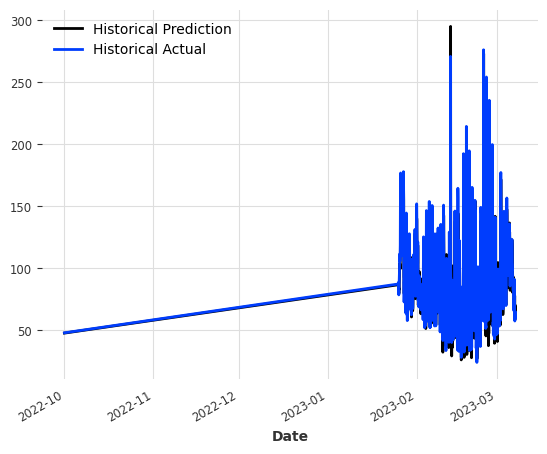

In [57]:
PlotPredictions(linReg3_preds)

### **MODEL 4 - PM2.5 with PM10, NO2 and NOx**

In [58]:
linearReg4 = LinearRegressionModel(lags=48, lags_past_covariates=48)
linearReg4.fit(train, past_covariates=series_hourly_pm25.stack(series_hourly_pm10).stack(series_hourly_no2).stack(series_hourly_nox))

In [59]:
linReg4_preds = MakePredictions(linearReg4)

  0%|          | 0/3779 [00:00<?, ?it/s]

3.278760559470971


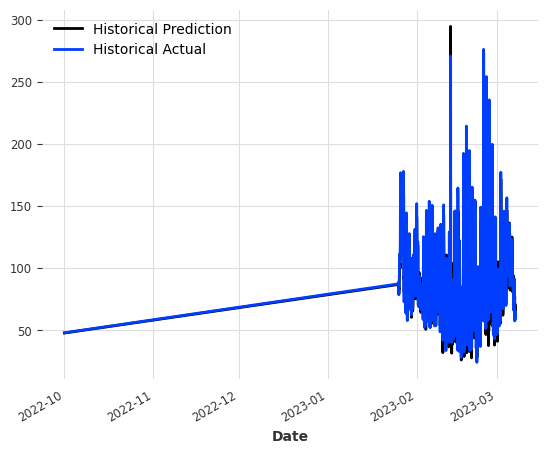

In [60]:
PlotPredictions(linReg4_preds)

### **MODEL 5 - PM2.5 with PM10, NO2, NOx and NH3**

In [61]:
linearReg5 = LinearRegressionModel(lags=48, lags_past_covariates=48)
linearReg5.fit(train, past_covariates=series_hourly_pm25.stack(series_hourly_pm10).stack(series_hourly_no2).stack(series_hourly_nox).stack(series_hourly_nh3))

In [62]:
linReg5_preds = MakePredictions(linearReg5)

  0%|          | 0/3779 [00:00<?, ?it/s]

3.256053374954851


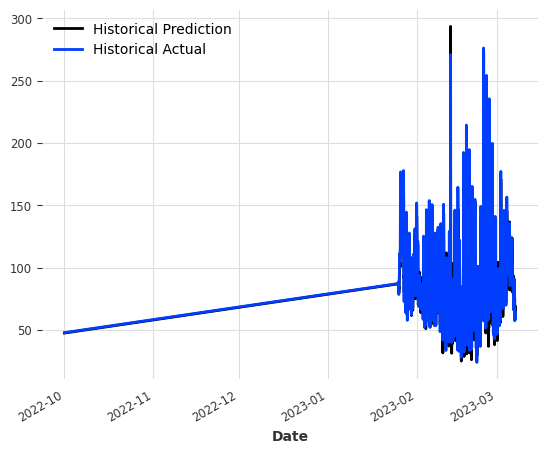

In [66]:
PlotPredictions(linReg5_preds)

### **MODEL 6 - PM2.5 with PM10, NO2, NOx, NH3 and Ozone**

In [67]:
linearReg6 = LinearRegressionModel(lags=48, lags_past_covariates=48)
linearReg6.fit(train, past_covariates=series_hourly_pm25.stack(series_hourly_pm10).stack(series_hourly_no2).stack(series_hourly_nox).stack(series_hourly_nh3).stack(series_hourly_ozone))

In [68]:
linReg6_preds = MakePredictions(linearReg6)

  0%|          | 0/3779 [00:00<?, ?it/s]

3.0918248393625873


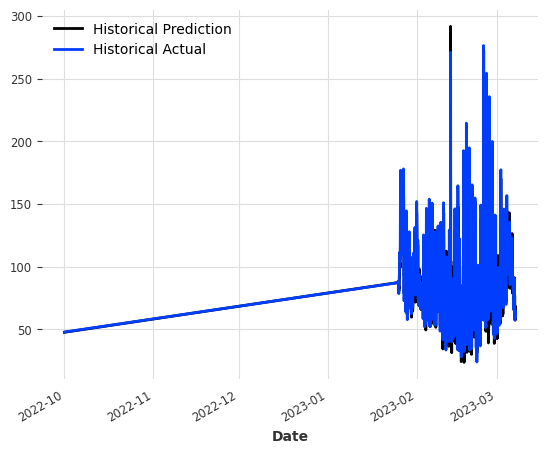

In [69]:
PlotPredictions(linReg6_preds)

### **MODEL 7 - PM2.5 with PM10, NO2, NOx, NH3, Ozone and NO**

In [70]:
linearReg7 = LinearRegressionModel(lags=48, lags_past_covariates=48)
linearReg7.fit(train, past_covariates=series_hourly_pm25.stack(series_hourly_pm10).stack(series_hourly_no2).stack(series_hourly_nox).stack(series_hourly_nh3).stack(series_hourly_ozone).stack(series_hourly_no))

In [74]:
linReg7_preds = MakePredictions(linearReg7)

  0%|          | 0/3779 [00:00<?, ?it/s]

3.59815827902887


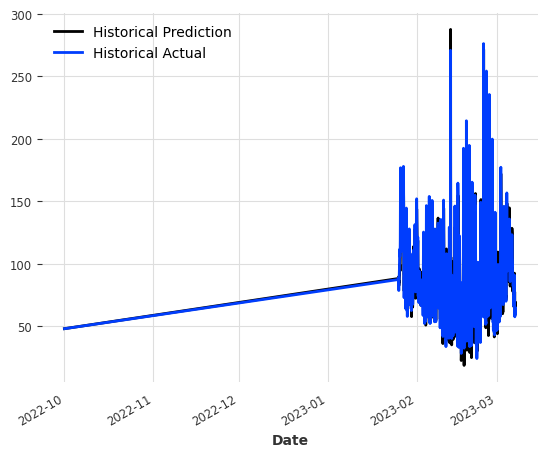

In [75]:
PlotPredictions(linReg7_preds)

### **EXPLORATION SUMMARY**

* **NBEATS models** - Performs okayish for 7-10 predictions. MAPE increases from then onwards (Unable to capture the peak rises which inturn increases the MAPE). As of now, unable to figure to figure out some tuning for caputing those peaks (TODO)

* **Linear Regression** had a much lower MAPE - Tried for multiple models with different features.
        *  MODEL1 - PM2.5 ::: MAPE- 3.57
        *  MODEL2 - PM2.5 and PM10 ::: MAPE- 3.57
        *  MODEL3 - PM2.5, PM10 and NO2 ::: MAPE- 3.36
        *  MODEL4 - PM2.5, PM10, NO2 and NOx ::: MAPE- 3.28
        *  MODEL5 - PM2.5, PM10, NO2, NOx and NH3 ::: MAPE- 3.256
        *  MODEL6 - PM2.5, PM10, NO2, NOx, NH3 and Ozone ::: MAPE- 3.09
        *  MODEL7 - PM2.5, PM10, NO2, NOx, NH3, Ozone and NO ::: MAPE- 3.6  